# Amazon Fine Food Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import math

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91722\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading the Data

In [2]:
df = pd.read_csv('amazon_fine_food_review.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df.shape

(568454, 10)

In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


As we can see there are 16 missing values in 'ProfileName' column and 27 missing values in 'Summary' column

In [7]:
# value count on 'Scores' column

df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

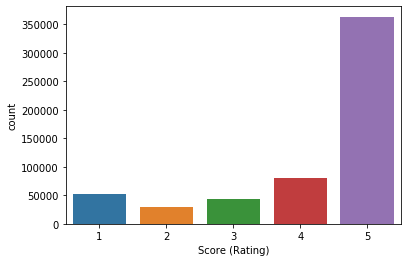

In [8]:
plt.figure()
sns.countplot(x='Score', data=df)
plt.xlabel('Score (Rating)')
plt.show()

We can see that 5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%).

Also we have 10 features and 568454 data points. There are some missing values in 'ProfileName' & 'Summary' columns. More than 75% of our data is belonging to positive class i.e. Score=4,5, which means we have an imbalanced dataset.

## Exploratory Data Analysis

Since there are very less missing values in the Dataset as compared to the total datapoints, therefore we will remove those rows with missing values.

In [9]:
df.isnull().sum(axis=0)

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df.dropna(subset=['ProfileName','Summary'], inplace=True)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.isnull().sum(axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

No missing values in the dataset now.

In [12]:
score = list(df['Score'])
sentiment = []

In [13]:
for i in score:
    if i>=3:
        sentiment.append("Positive")
    elif i<3:
        sentiment.append("Negative")

In [14]:
df['Sentiment'] = pd.DataFrame(sentiment)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [15]:
df.isnull().sum(axis=0)

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
Sentiment                 43
dtype: int64

In [16]:
df.dropna(subset=['Sentiment'], inplace=True)

In [17]:
df.isnull().sum(axis=0)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Sentiment                 0
dtype: int64

Now there are no missing values in the final dataset

In [18]:
df.Sentiment.value_counts()

Positive    486363
Negative     82005
Name: Sentiment, dtype: int64

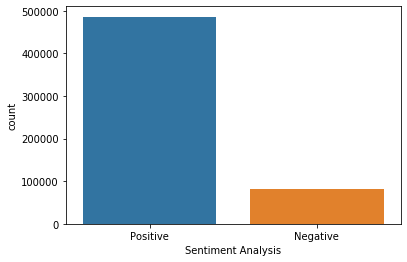

In [19]:
sns.countplot(x='Sentiment', order=['Positive', 'Negative'], data=df)
plt.xlabel('Sentiment Analysis')
plt.show()

We could conclude that the positive reviews are way more than the negative reviews. Therefore, Data is highly imbalanced

## Some common words in reviews

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568368 entries, 0 to 568410
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568368 non-null  int64 
 1   ProductId               568368 non-null  object
 2   UserId                  568368 non-null  object
 3   ProfileName             568368 non-null  object
 4   HelpfulnessNumerator    568368 non-null  int64 
 5   HelpfulnessDenominator  568368 non-null  int64 
 6   Score                   568368 non-null  int64 
 7   Time                    568368 non-null  int64 
 8   Summary                 568368 non-null  object
 9   Text                    568368 non-null  object
 10  Sentiment               568368 non-null  object
dtypes: int64(5), object(6)
memory usage: 72.0+ MB


In [21]:
positive = df.loc[df['Sentiment'] == 'Positive']
positive = positive[0:25000]
positive

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,Positive
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,Positive
...,...,...,...,...,...,...,...,...,...,...,...
29364,29365,B000PDY3P0,A3V7DO24D4LR53,Missie,0,0,5,1330300800,"Couldn't be easier! Delicous, too!",Simple to make. Delicious popcorn! Great porti...,Positive
29365,29366,B000PDY3P0,A20MIA9LW4M36I,"Margaret Malto ""anytime-shopping""",0,0,5,1330300800,"Great taste, convenient, coming back!!",Delicious Taste & so.......Convenient! I boug...,Positive
29366,29367,B000PDY3P0,A2I85CXWERIJVM,Doone,0,0,4,1330214400,Popcorn packages,Like the popcorn. Maybe too much salt in the ...,Positive
29367,29368,B000PDY3P0,ADOANPOQU2SVT,John,0,0,5,1330041600,Good Stuff,This is great popcorn at a great price. I lear...,Positive


In [22]:
negative = df.loc[df['Sentiment'] == 'Negative']
negative = negative[0:25000]
negative 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,Negative
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,Negative
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Negative
...,...,...,...,...,...,...,...,...,...,...,...
171975,171976,B00141QX32,A4M6KDPANOBF5,W. Chang,2,3,5,1300924800,my dog's favorite,This is the only one treat my dog really gets ...,Negative
171976,171977,B00141QX32,A20RDJ4OKOWPOF,Pat,0,0,1,1350604800,Proceed With Caution,My beloved black Lab recently experienced live...,Negative
171977,171978,B00141QX32,A38BLIS5VGGL84,BB,0,0,5,1349222400,Vitality Mini Chicken treats,My dogs love these and they are small enough t...,Negative
171978,171979,B00141QX32,A3I2AAVYHPPMVS,buttons & bows,0,0,5,1345075200,Real Deal,I am a repeat customer for this product. I ha...,Negative


In [23]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Summary"]:
        text = str(val).lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [24]:
create_Word_Corpus(positive)

"good quality dog food `` delight '' says great taffy nice taffy great ! good expensive brands ! wonderful , tasty taffy yay barley healthy dog food best hot sauce world cats love `` diet '' food better regular food fresh greasy ! strawberry twizzlers - yummy lots twizzlers , expect . love ! great sweet candy ! home delivered twizlers always fresh twizzlers delicious product ! twizzlers please sell mexico ! ! twizzlers - strawberry great bargain price yummy ! best hot sauce world great machine ! taste ... best instant oatmeals good instant great irish oatmeal hurry ! satisfying love gluten free oatmeal ! ! ! 's oatmeal good way start day ... . wife 's favorite breakfast would n't buy oatmeal mcanns ? tastes great ! oatmeal oatmeal lovers food-great good hot breakfast great taste convenience hearty oatmeal good mushy good next time wo n't order variety pack stuff hot ! good ! came back : ) 'll go nuts ass-kickin ' peanuts . ass kickin roasts smooth brew guests love ! awesome deal ! go w

In [25]:
create_Word_Corpus(negative)

"advertised cough medicine cats fans new food poor taste nasty flavor n't like stale product . taste good . warning ! warning ! -alcohol sugars ! nothing special tea flavor bad low carb angel food puffs broken bottle bottoms ! rip price tasteless low calorie low quality banana runts altoids smalls n't breath mints nearly killed cats changed formula makes cats sick ! ! ! ! price correct real tea good furniture polish taste taste neutral , quantity deceitful ! disappointed sad outcome n't waste money ca n't handle caffeine , . reeks like chemicals disappointed ! lie ! ! ! ! priced chips lack rice taste awful barely describe dissapointed quantity ! never arrived awful taste good bitter waste money cat wo n't go near ! msg ham base poor item packaging awful disappointing look elsewhere whole grains 70 % chips bag cooked creamy chivey ... good tangy salt vinegar chips love kettle chips , flavor ! maybe worst chips ever . surprise 1 's different ... better `` jalapeno kettle chips '' potato 

In [26]:
df.Score.value_counts()

5    363082
4     80652
1     52260
3     42637
2     29737
Name: Score, dtype: int64

## Usefulness 

In [27]:
n = df['HelpfulnessNumerator']/df['HelpfulnessDenominator']

df["Usefulness"] = n.apply(lambda n: ">75%" if n > 0.75 else("<25%" if n < 0.25 else("25-75%" if n >= 0.25 and n <= 0.75 else "useless")))

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Usefulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,>75%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,useless
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,>75%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,>75%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,useless


In [28]:
df.Usefulness.value_counts()

useless    270018
>75%       202815
25-75%      57282
<25%        38253
Name: Usefulness, dtype: int64

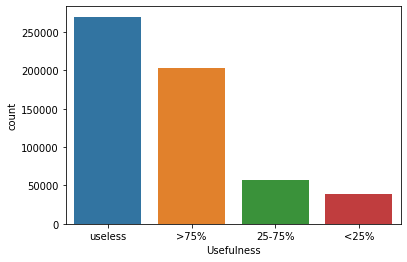

In [29]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=df)
plt.xlabel('Usefulness')
plt.show()

In [30]:
df[df.Score==5].Usefulness.value_counts()

useless    186721
>75%       142936
25-75%      21314
<25%        12111
Name: Usefulness, dtype: int64

In [31]:
df[df.Score==2].Usefulness.value_counts()

useless    10600
>75%        7422
25-75%      6692
<25%        5023
Name: Usefulness, dtype: int64

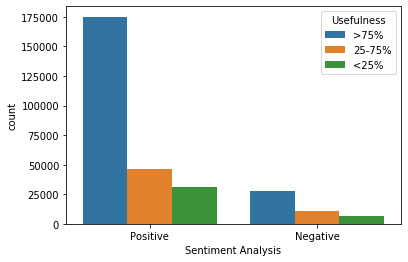

In [32]:
sns.countplot(x='Sentiment', hue='Usefulness', order=['Positive', 'Negative'], hue_order=['>75%', '25-75%', '<25%'], data=df)
plt.xlabel('Sentiment Analysis')
plt.show()

From the above plot positive reviews are found more helpful

As the rating becomes more positive, the reviews become more helpful

### Now let us count the number of words 

In [33]:
df['text_word_count'] = df['Text'].apply(lambda text: len(text.split()))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Usefulness,text_word_count
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,>75%,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,useless,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,>75%,94
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,>75%,41
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,useless,27


In [34]:
df[df.Score==1].text_word_count.median()

62.0

In [35]:
df[df.Score==2].text_word_count.median()

67.0

In [36]:
df[df.Score==3].text_word_count.median()

70.0

In [37]:
df[df.Score==4].text_word_count.median()

65.0

In [38]:
df[df.Score==5].text_word_count.median()

52.0

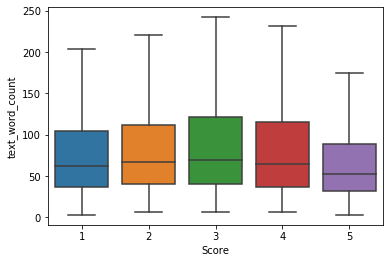

In [39]:
sns.boxplot(x='Score', y='text_word_count', data=df, showfliers=False)
plt.show()

 5-star reviews had the lowest median word count (52 words), while 3-star reviews had the largest median word count (70 words)

## Frequency of reviewers

In [40]:
x = df.UserId.value_counts()
x.to_dict()

{'A3OXHLG6DIBRW8': 448,
 'A1YUL9PCJR3JTY': 421,
 'AY12DBB0U420B': 389,
 'A281NPSIMI1C2R': 365,
 'A1Z54EM24Y40LL': 256,
 'A1TMAVN4CEM8U8': 204,
 'A2MUGFV2TDQ47K': 201,
 'A3TVZM3ZIXG8YW': 199,
 'A3PJZ8TU8FDQ1K': 178,
 'AQQLWCMRNDFGI': 176,
 'A2SZLNSI5KOQJT': 175,
 'A29JUMRL1US6YP': 172,
 'AZV26LP92E6WU': 167,
 'AY1EF0GOH80EK': 162,
 'A31N6KB160O508': 162,
 'A2FRFAQCWZJT3Q': 161,
 'A1UQBFCERIP7VJ': 157,
 'AKMEY1BSHSDG7': 155,
 'A1LZJZIHUPLDV4': 154,
 'A1WX42M589VAMQ': 151,
 'A3D6OI36USYOU1': 150,
 'A2Y8IDC1FKGNJC': 150,
 'A3HPCRD9RX351S': 149,
 'A2PNOU7NXB1JE4': 143,
 'AKZKG2Z7CNV27': 143,
 'A33AQPJYH7UUXR': 142,
 'A35R32TA60XD57': 141,
 'A1IU7S4HCK1XK0': 140,
 'A1X1CEGHTHMBL1': 135,
 'A36WGHR8TO5DKT': 134,
 'AQLL2R1PPR46X': 133,
 'A2DPYMNI2HCIOI': 133,
 'A3FY3H6F4249E0': 127,
 'A1HRYC60VTMYC0': 126,
 'A2GEZJHBV92EVR': 125,
 'ADS5APY1NKTL4': 125,
 'A3FKGKUCI3DG9U': 124,
 'ALSAOZ1V546VT': 123,
 'A3F3B1JPACN215': 121,
 'A1P2XYD265YE21': 120,
 'A2XNOB1T796Y6B': 119,
 'A36MP37DITBU6F': 118,
 

In [41]:
df['reviewer_freq'] = df['UserId'].apply(lambda counts: "Frequent (>50 reviews)" if x[counts]>50 else "Not Frequent (1-50)")

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Usefulness,text_word_count,reviewer_freq
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,>75%,48,Not Frequent (1-50)
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,useless,31,Not Frequent (1-50)
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,>75%,94,Not Frequent (1-50)
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,>75%,41,Not Frequent (1-50)
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,useless,27,Not Frequent (1-50)


## Are frequent reviewers more helpful ?

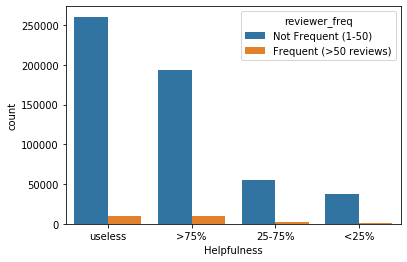

In [42]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], hue='reviewer_freq', data=df)
plt.xlabel('Helpfulness')
plt.show()

Frequent reviewers are more likely to have their review voted on and when voted on, more likely to be voted helpful, and less likely to be unhelpful.

## Are frequent reviewers more verbose ?

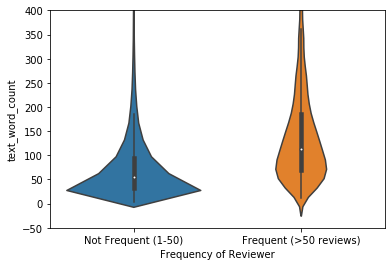

In [43]:
sns.violinplot(x='reviewer_freq', y='text_word_count', data=df)
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()

The distributions of word counts for frequent and infrequent reviews shows that infrequent reviewers have a large amount of reviews of low word count. On the other hand, the largest concentration of word count is higher for frequent reviewers than for infrequent reviews. Moreover, the median word count for frequent reviewers is higher than the median for infrequent reviewers.

# Conclusion of this Analysis

a. Positive reviews are very common

b. Positive reviews are shorter in length

c. Longer reviews were more helpful

d. Despite being more common and shorter, positive reviews are found more helpful

e. Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews